<a href="https://colab.research.google.com/github/keviacs/sales-forecast-arima/blob/main/ARIMA_Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#Create dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


dates = pd.date_range(start='2022-01-01',end='2024-12-31',freq='D')
n_days = len(dates)
df = pd.DataFrame(index=dates)
product_name = ['Queso Parmesano', 'Aceite de Oliva','Pasta Fresca','Vino Chianti']



for product in product_name:
  base_sales = np.random.randint(20,50)
  trend = np.linspace(start=base_sales, stop=base_sales * 1.5, num=n_days)
  weekly_seasonality = np.sin(np.arange(n_days)* 2*np.pi / 7) * 5
  yearly_seasonality = np.sin(np.arange(n_days)* 2*np.pi / 365.25) * 15
  seasonality = weekly_seasonality + yearly_seasonality
  noise = np.random.normal(loc=0, scale=5, size=n_days)
  sales_data = trend + seasonality + noise
  sales_data[sales_data < 0] = 0
  df[product] = sales_data.astype(int)

In [31]:
##Divide Data

product_data = df['Pasta Fresca']
train_data = product_data[:-180]
test_data = product_data[-180:]

In [32]:
##Train Model ARIMA

final_arima_model = sm.tsa.ARIMA(train_data, order=(2, 2, 2))
final_arima_model_results = final_arima_model.fit()
print("Trained Model")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Trained Model


In [33]:
##Evaluate and predict
start_date = test_data.index[0]
end_date = test_data.index[-1]
predictions = final_arima_model_results.predict(start=start_date, end=end_date)


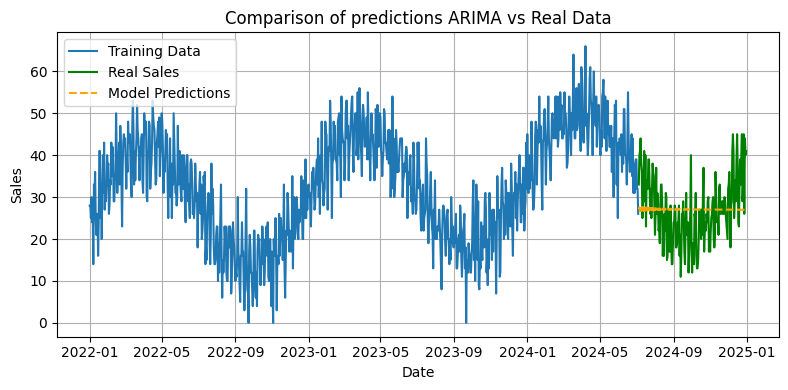

In [38]:
##Visualize Data

plt.figure(figsize=(8,4))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Real Sales',color='green')
plt.plot(predictions, label='Model Predictions',color='orange',linestyle = '--')
plt.title('Comparison of predictions ARIMA vs Real Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.tight_layout()
plt.grid(True)
plt.legend()

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mae = mean_absolute_error(test_data, predictions)
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}")


RMSE: 7.91, MAE: 6.36


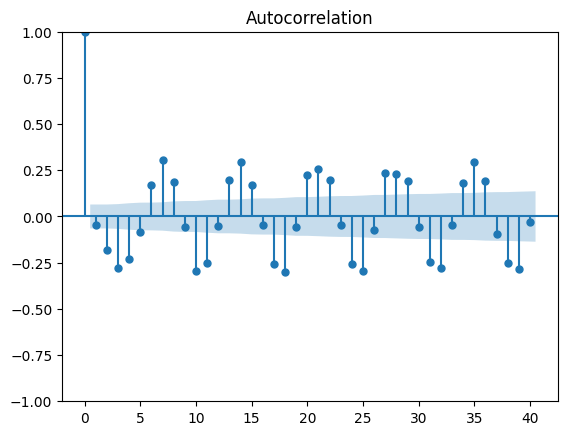

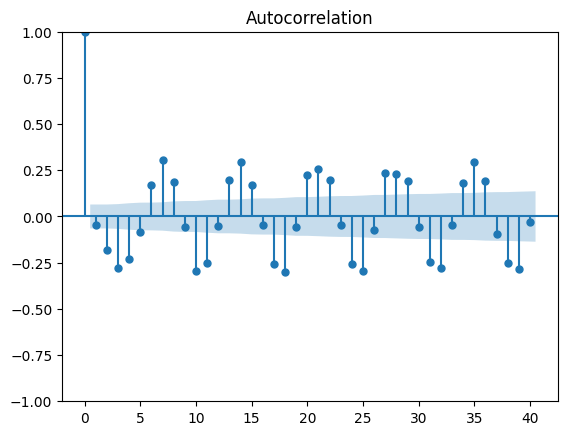

In [43]:
residuals = final_arima_model_results.resid
sm.graphics.tsa.plot_acf(residuals.dropna(), lags=40)
